In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [46]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [47]:
print("First 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [48]:
print("\nClass Distribution:")
print(df['species'].value_counts())



Class Distribution:
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


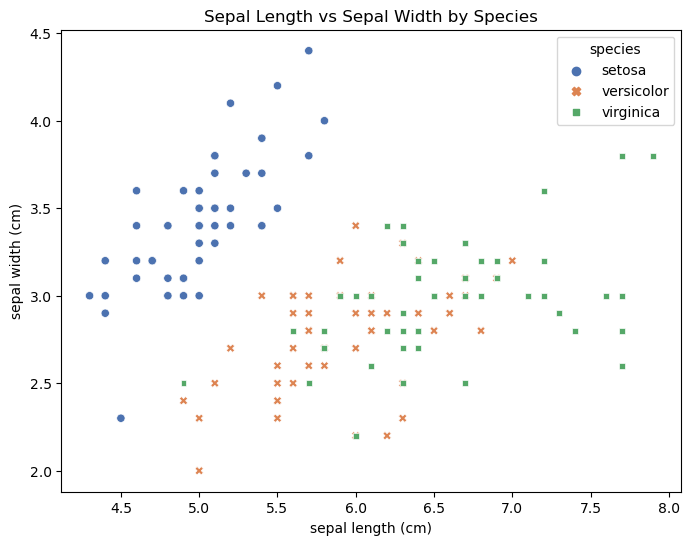

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='species',
    style='species',
    palette='deep'
)
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()


In [50]:
X = df.iloc[:, :-1]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
test_accuracy_k3 = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy with k=3: {test_accuracy_k3:.4f}")



Test Accuracy with k=3: 0.9556


In [52]:
k_range = range(1, 21)
accuracies = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


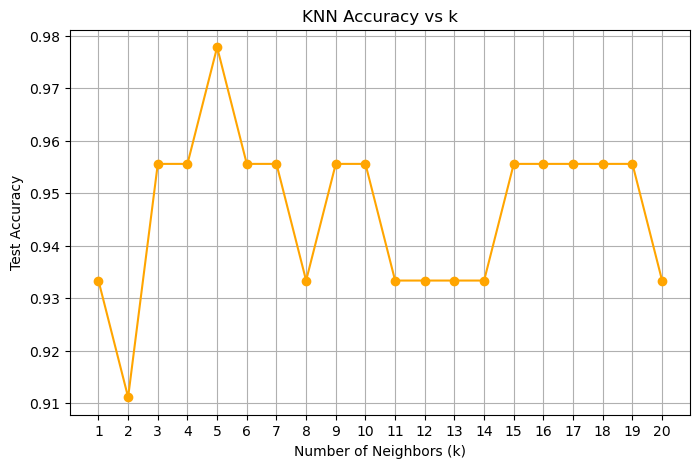

In [53]:
plt.figure(figsize=(8,5))
plt.plot(k_range, accuracies, marker='o', color='orange')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.title("KNN Accuracy vs k")
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [54]:
best_k = k_range[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"\nBest k = {best_k} with Accuracy = {best_accuracy:.4f}")



Best k = 5 with Accuracy = 0.9778
